In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/SalaryData_Train(1).csv')

In [3]:
df.sample(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
373,50,State-gov,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
28366,29,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
500,27,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
11590,28,Private,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
23011,26,Local-gov,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,Peru,<=50K


Data Description:

- age -- age of a person
- workclass	-- A work class is a grouping of work
- education	-- Education of an individuals
- maritalstatus -- Marital status of an individulas
- occupation	 -- occupation of an individuals
- relationship --
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week
- native -- Native of an individual
- Salary -- salary of an individual

In [4]:
df.shape

(30161, 14)

In [5]:
df.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

education         16

educationno       16

both column look doubtful

In [6]:
np.sort(df.educationno.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [7]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [8]:
df.groupby('education')['educationno'].unique().reset_index().sort_values(by = 'educationno')

,education,educationno
13,Preschool,[1]
3,1st-4th,[2]
4,5th-6th,[3]
5,7th-8th,[4]
6,9th,[5]
0,10th,[6]
1,11th,[7]
2,12th,[8]
11,HS-grad,[9]
15,Some-college,[10]


above shows that column 'educationno' is numerical representation of column 'education',

as education is ordinal column so we need educationno and we can we can remove education column from table

In [9]:
df.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

## shows unbalanced dataset
we will improve the datasets at later stage

In [10]:
df.select_dtypes(include=['object']).columns.tolist()

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [11]:
df.select_dtypes(include=['int64']).columns.tolist()

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [12]:
df.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [13]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

null values are not there => good

In [14]:
df.duplicated().sum()

3258

In [15]:
df = df.drop_duplicates()

In [16]:
# drop education column
df = df.drop(columns = 'education', axis = 1)

In [17]:
df.shape

(26903, 13)

# Outliers checkup

<Axes: >

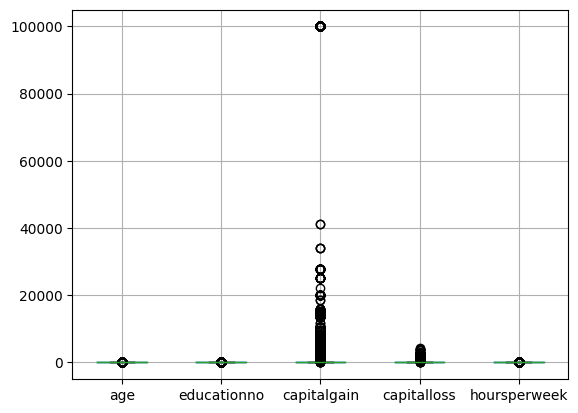

In [18]:
df.boxplot()

<Axes: >

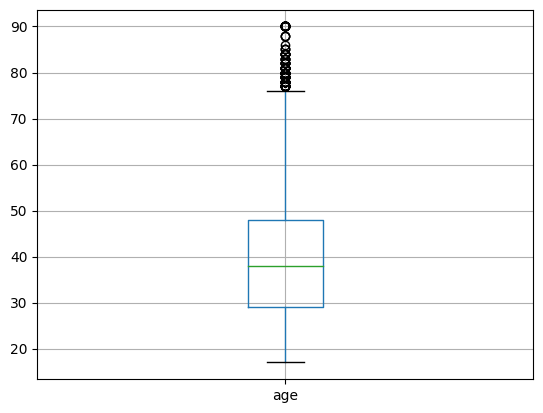

In [19]:
df[['age']].boxplot()

<Axes: >

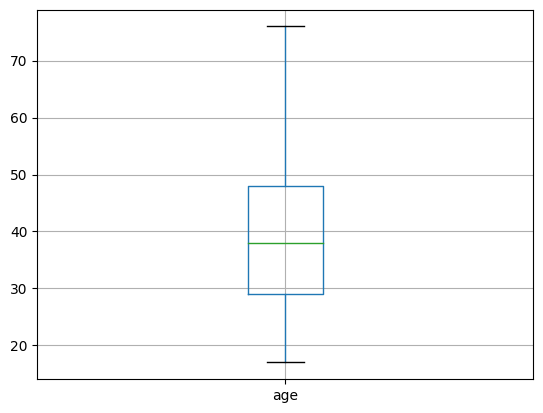

In [20]:
import numpy as np

def remove_outliers_iqr(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean[column] = np.where(df_clean[column] < lower_bound, df_clean[column].median(), df_clean[column])
    df_clean[column] = np.where(df_clean[column] > upper_bound, df_clean[column].median(), df_clean[column])
    return df_clean

df = remove_outliers_iqr(df, 'age')
df[['age']].boxplot()

<Axes: >

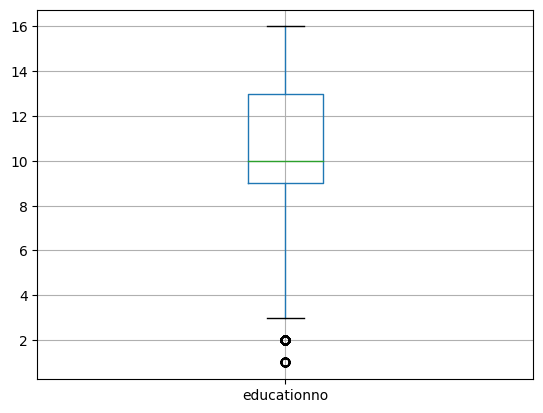

In [21]:
df[['educationno']].boxplot()

<Axes: >

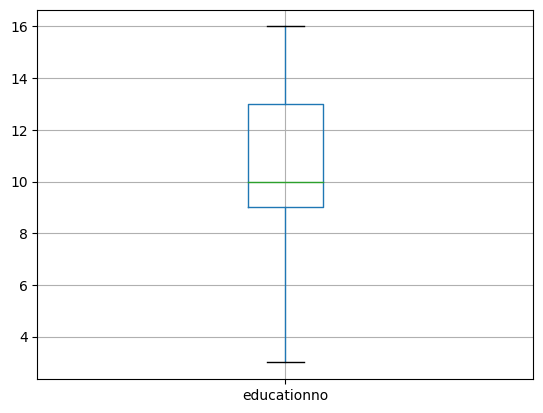

In [22]:
df = remove_outliers_iqr(df, 'educationno')
df[['educationno']].boxplot()

<Axes: >

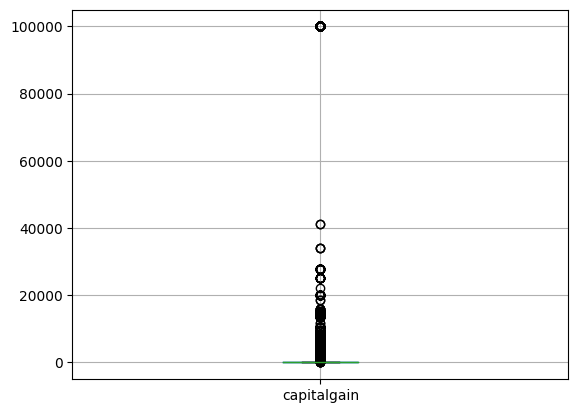

In [23]:
df[['capitalgain']].boxplot()

<Axes: >

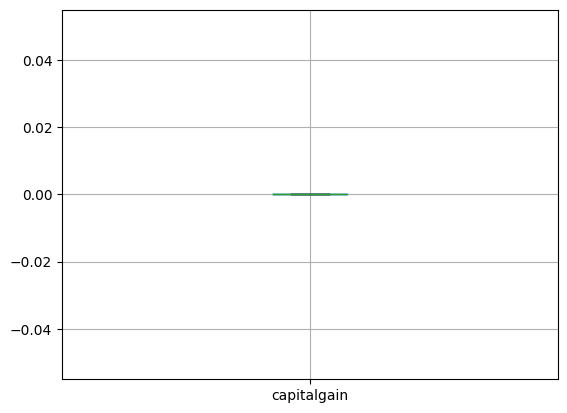

In [24]:
df = remove_outliers_iqr(df, 'capitalgain')
df[['capitalgain']].boxplot()

<Axes: >

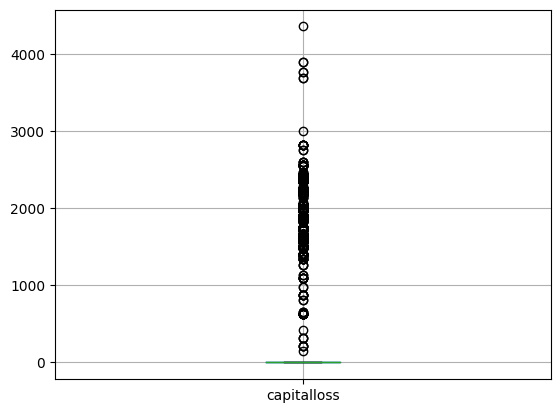

In [25]:
df[['capitalloss']].boxplot()

<Axes: >

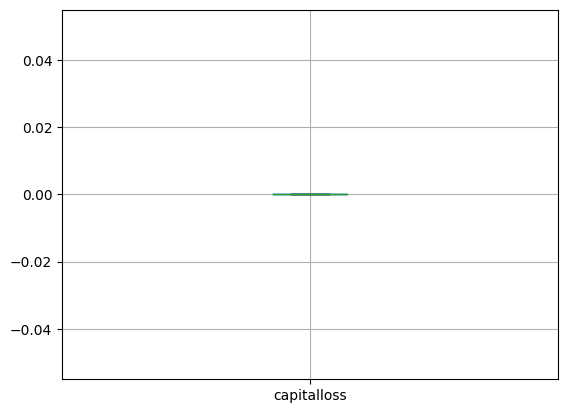

In [26]:
df = remove_outliers_iqr(df, 'capitalloss')
df[['capitalloss']].boxplot()

<Axes: >

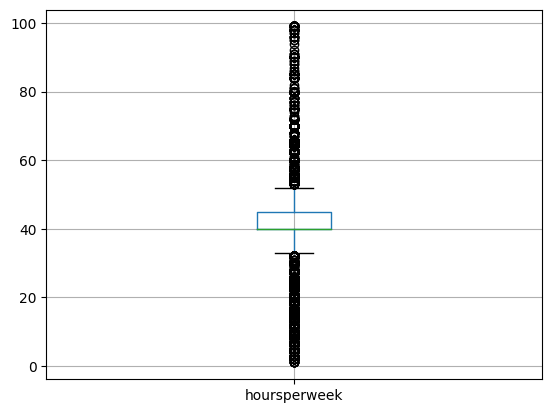

In [27]:
df[['hoursperweek']].boxplot()

<Axes: >

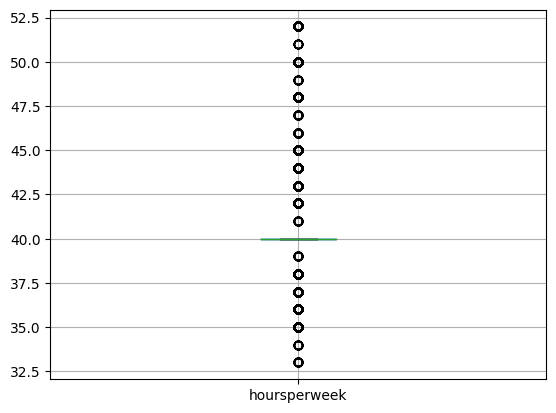

In [28]:
df = remove_outliers_iqr(df, 'hoursperweek')
df[['hoursperweek']].boxplot()

<Axes: >

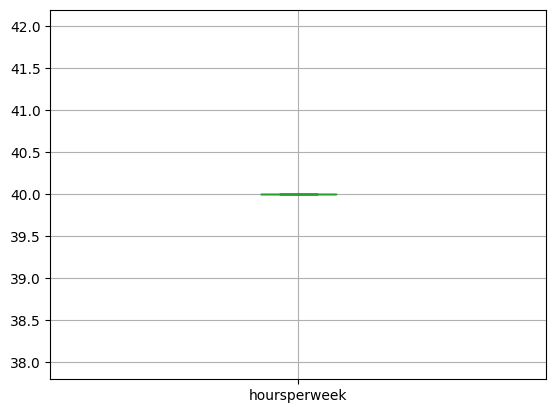

In [29]:
df = remove_outliers_iqr(df, 'hoursperweek')
df[['hoursperweek']].boxplot()

<Axes: >

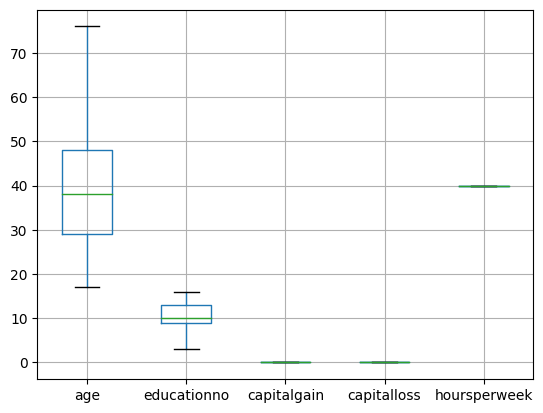

In [30]:
df.boxplot()

### all the outliers are taken care off

In [31]:
df.workclass.value_counts()

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

In [32]:
df.occupation.value_counts()

 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other-service        2914
 Machine-op-inspct    1665
 Transport-moving     1420
 Handlers-cleaners    1159
 Farming-fishing       957
 Tech-support          858
 Protective-serv       626
 Priv-house-serv       141
 Armed-Forces            9
Name: occupation, dtype: int64

In [33]:
# column encoding
# onehotencoding or dummy creation for nominal i/p columns and
# since workclass and occupation both seems to be ordinal but due to unavailability of domain knowledge i'm treating them as nominal

# ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native'] = object dtypes => these need to be encoded
# ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'] = int => no need to encode

df_encoded = pd.get_dummies(df, columns= ['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native'], drop_first = True)

# label encoding for output
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['Salary'] = label_encoder.fit_transform(df['Salary'])

df_encoded.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39.0,13.0,0.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,13.0,0.0,0.0,40.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38.0,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,7.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28.0,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_encoded.shape, df.shape

((26903, 80), (26903, 13))

# Model Building

In [35]:
X= df_encoded.drop('Salary', axis=1)
y= df_encoded.Salary

y.value_counts()

0    20023
1     6880
Name: Salary, dtype: int64

In [36]:
# need oversampling after train-test split
# though we do not require to split as testing data is already available to us, so here we will keep test size very less

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# oversapmling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import Counter

# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 15991, 1: 15991})


In [38]:
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled)

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001] }]

grid = GridSearchCV(estimator=SVC(), cv=KFold(n_splits=5), param_grid=param_grid, verbose = 300)
grid.fit(X_resampled, y_resampled)
grid.score(X_resampled, y_resampled)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START C=10, gamma=0.5, kernel=linear.............................
[CV 1/5; 1/18] END C=10, gamma=0.5, kernel=linear;, score=0.787 total time= 3.0min
[CV 2/5; 1/18] START C=10, gamma=0.5, kernel=linear.............................
[CV 2/5; 1/18] END C=10, gamma=0.5, kernel=linear;, score=0.773 total time= 3.2min
[CV 3/5; 1/18] START C=10, gamma=0.5, kernel=linear.............................
[CV 3/5; 1/18] END C=10, gamma=0.5, kernel=linear;, score=0.773 total time= 3.2min
[CV 4/5; 1/18] START C=10, gamma=0.5, kernel=linear.............................
[CV 4/5; 1/18] END C=10, gamma=0.5, kernel=linear;, score=0.843 total time= 4.2min
[CV 5/5; 1/18] START C=10, gamma=0.5, kernel=linear.............................
[CV 5/5; 1/18] END C=10, gamma=0.5, kernel=linear;, score=0.864 total time= 4.6min
[CV 1/5; 2/18] START C=10, gamma=0.5, kernel=rbf................................
[CV 1/5; 2/18] END .C=10, gamma=0.5, k

0.9456569320242636

In [40]:
grid.best_params_

{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}

In [41]:
grid.best_score_

0.8455719941033178

In [43]:
model = SVC(kernel='rbf', C=10, gamma=0.5)

model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

model.score(X_resampled, y_resampled), model.score(X_test, y_test)

(0.9456569320242636, 0.7738338598773462)

In [44]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.83      0.85      4032
     class 1       0.54      0.62      0.58      1349

    accuracy                           0.77      5381
   macro avg       0.70      0.72      0.71      5381
weighted avg       0.78      0.77      0.78      5381



Text(0.5, 1.0, 'Confusion Matrix')

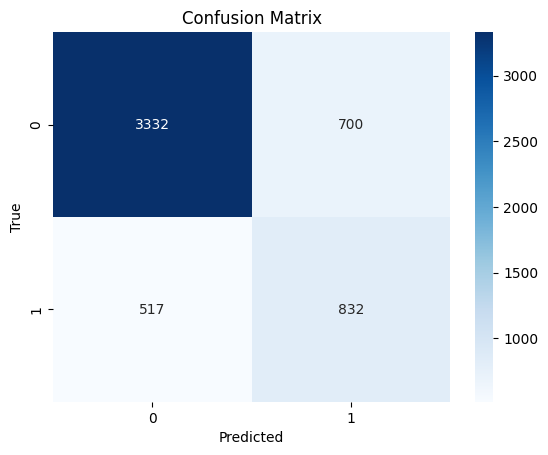

In [45]:
from sklearn.metrics import confusion_matrix

conf_matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

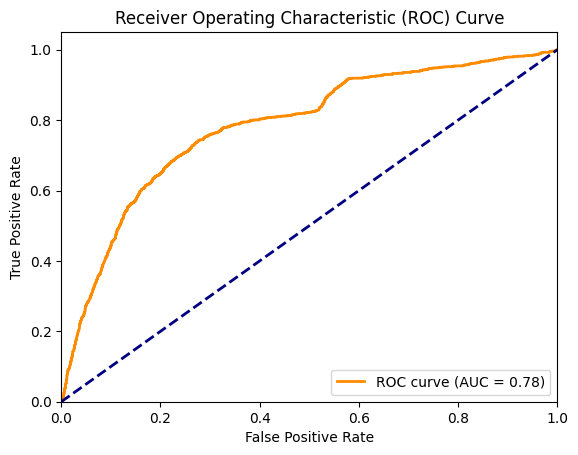

In [46]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 0, 'Feature 3')

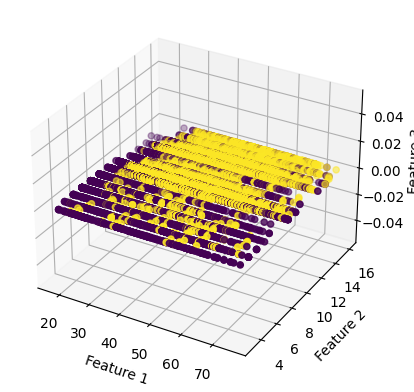

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming X contains your 8 features
ax.scatter(X_resampled.iloc[:, 0], X_resampled.iloc[:, 1], X_resampled.iloc[:, 2], c = y_resampled)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# ---------------------------------------------------------------------------------------

# Model performance on testing dataset

In [49]:
df_test = pd.read_csv('/content/SalaryData_Test(1).csv')


In [50]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [53]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [54]:
df_test.duplicated().sum()

930

In [55]:
df_test = df_test.drop_duplicates()

In [56]:
df_test.drop('education', axis =1, inplace = True)

In [58]:
# column encoding
# onehotencoding or dummy creation for nominal i/p columns and
# since workclass and occupation both seems to be ordinal but due to unavailability of domain knowledge i'm treating them as nominal

# ['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native'] = object dtypes => these need to be encoded
# ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'] = int => no need to encode

df_test_encoded = pd.get_dummies(df_test, columns= ['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native'], drop_first = True)

# label encoding for output
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_test_encoded['Salary'] = label_encoder.fit_transform(df_test['Salary'])

df_test_encoded.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
df_test_encoded.shape

(14130, 80)

In [60]:
X_test= df_test_encoded.drop('Salary', axis=1)
y_test= df_test_encoded.Salary

In [65]:
# since model is already created, we can directly prdict

y_pred = model.predict(X_test)

In [63]:
model.score(X_test, y_test)

0.7446567586694975

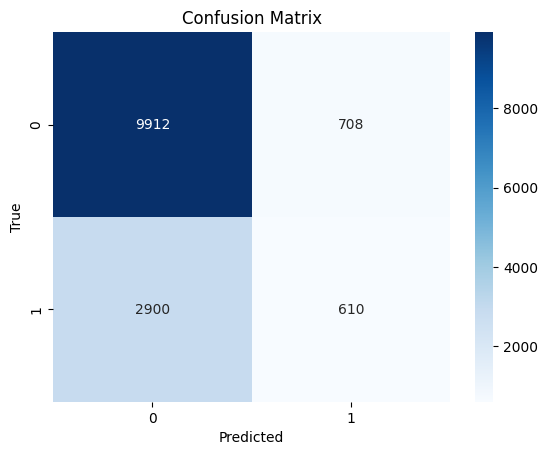

In [66]:
from sklearn.metrics import confusion_matrix

conf_matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


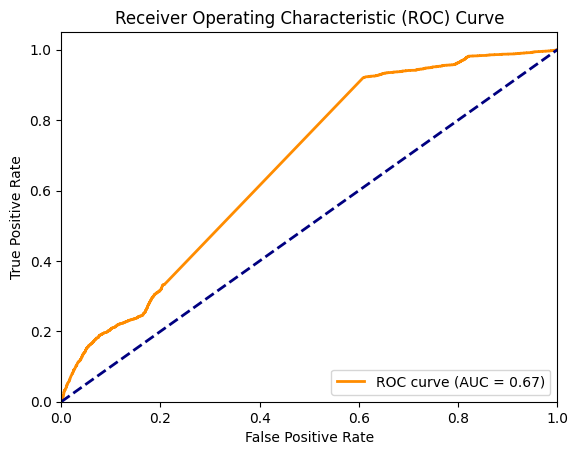

In [67]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 0, 'Feature 3')

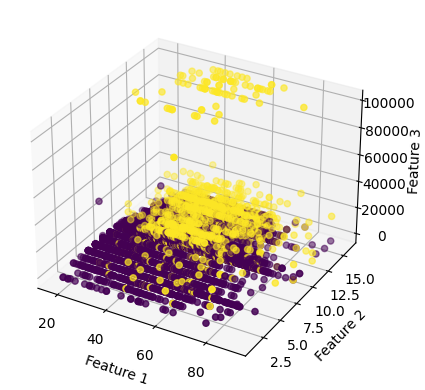

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming X contains your 8 features
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2], c = y_test)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')